In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Province_allCrop.xlsx')

In [3]:
df.head()

,province,year,total_holding,area_planted(ha),area_harvested(ha),qty_harvested(ton),total_yiel(kg/ha),fertilizer,pesticide,irrigation,croptype,zone_group
0,Kampong Cham,2020,74000,95000,89000,251000.0,2820.224719,66000,54000,44000,non-aromatic,Plain Zone
1,Kandal,2020,58000,54000,53000,178000.0,3358.490566,50000,38000,42000,non-aromatic,Plain Zone
2,Phnom Penh,2020,12000,8000,7000,15000.0,2142.857143,11000,2000,5000,non-aromatic,Plain Zone
3,Prey Veng,2020,162000,292000,286000,854000.0,2986.013986,161000,124000,107000,non-aromatic,Plain Zone
4,Svay Rieng,2020,79000,105000,104000,251000.0,2413.461538,78000,60000,12000,non-aromatic,Plain Zone


In [4]:
df["fertilizer"] = df["fertilizer"] / df["total_holding"]
df["pesticide"] = df["pesticide"] / df["total_holding"]
df["irrigation"] = df["irrigation"] / df["total_holding"]

In [5]:
df.head()

,province,year,total_holding,area_planted(ha),area_harvested(ha),qty_harvested(ton),total_yiel(kg/ha),fertilizer,pesticide,irrigation,croptype,zone_group
0,Kampong Cham,2020,74000,95000,89000,251000.0,2820.224719,0.891892,0.729730,0.594595,non-aromatic,Plain Zone
1,Kandal,2020,58000,54000,53000,178000.0,3358.490566,0.862069,0.655172,0.724138,non-aromatic,Plain Zone
2,Phnom Penh,2020,12000,8000,7000,15000.0,2142.857143,0.916667,0.166667,0.416667,non-aromatic,Plain Zone
3,Prey Veng,2020,162000,292000,286000,854000.0,2986.013986,0.993827,0.765432,0.660494,non-aromatic,Plain Zone
4,Svay Rieng,2020,79000,105000,104000,251000.0,2413.461538,0.987342,0.759494,0.151899,non-aromatic,Plain Zone


In [6]:
zone_crop_year_totals = df.groupby(['croptype', 'year']).agg(
    Yn=('qty_harvested(ton)', 'sum'),
    Tn=('area_harvested(ha)', 'sum')
).reset_index()

In [7]:
df = pd.merge(df, zone_crop_year_totals, on=['croptype', 'year'], how='left')

In [8]:
df['API'] = (df['qty_harvested(ton)'] / df['Yn']) / (df['area_harvested(ha)'] / df['Tn']) * 100

In [9]:
df.head()

,province,year,total_holding,area_planted(ha),area_harvested(ha),qty_harvested(ton),total_yiel(kg/ha),fertilizer,pesticide,irrigation,croptype,zone_group,Yn,Tn,API
0,Kampong Cham,2020,74000,95000,89000,251000.0,2820.224719,0.891892,0.729730,0.594595,non-aromatic,Plain Zone,4583000.0,1820000,111.996705
1,Kandal,2020,58000,54000,53000,178000.0,3358.490566,0.862069,0.655172,0.724138,non-aromatic,Plain Zone,4583000.0,1820000,133.372307
2,Phnom Penh,2020,12000,8000,7000,15000.0,2142.857143,0.916667,0.166667,0.416667,non-aromatic,Plain Zone,4583000.0,1820000,85.097098
3,Prey Veng,2020,162000,292000,286000,854000.0,2986.013986,0.993827,0.765432,0.660494,non-aromatic,Plain Zone,4583000.0,1820000,118.580525
4,Svay Rieng,2020,79000,105000,104000,251000.0,2413.461538,0.987342,0.759494,0.151899,non-aromatic,Plain Zone,4583000.0,1820000,95.843334


In [10]:
df.describe()

,year,total_holding,area_planted(ha),area_harvested(ha),qty_harvested(ton),total_yiel(kg/ha),fertilizer,pesticide,irrigation,Yn,Tn,API
count,236.000000,236.000000,2.360000e+02,2.360000e+02,2.360000e+02,236.000000,236.000000,236.000000,236.000000,2.360000e+02,2.360000e+02,236.000000
mean,2020.639831,29956.906780,5.600765e+06,5.031712e+06,2.706538e+07,4596.371205,0.684069,0.542495,0.278024,5.020909e+08,8.601825e+07,91.848349
std,1.450437,33464.258688,1.482126e+07,1.356160e+07,9.378842e+07,4211.748657,0.357859,0.319989,0.739257,1.076093e+09,1.509530e+08,30.429272
min,2019.000000,1000.000000,1.000000e+03,1.000000e+03,2.000000e+03,536.585366,0.000000,0.000000,0.000000,1.738172e+04,3.730000e+03,3.698995
25%,2019.000000,7000.000000,2.821750e+04,2.799000e+04,8.920325e+04,2089.750342,0.500000,0.313604,0.000000,2.738752e+06,4.976210e+05,74.339035
50%,2020.000000,17790.000000,8.185650e+04,7.781500e+04,2.767539e+05,2617.482666,0.857143,0.626731,0.115041,5.664900e+06,1.899739e+06,89.656117
75%,2022.000000,39590.000000,8.625000e+05,5.427500e+05,2.719250e+06,4969.632969,0.977432,0.779314,0.401983,3.467290e+08,7.662300e+07,108.927749
max,2023.000000,171230.000000,9.408500e+07,8.682000e+07,7.806800e+08,22552.973754,1.000000,1.000000,10.570292,3.814664e+09,4.185610e+08,215.999762


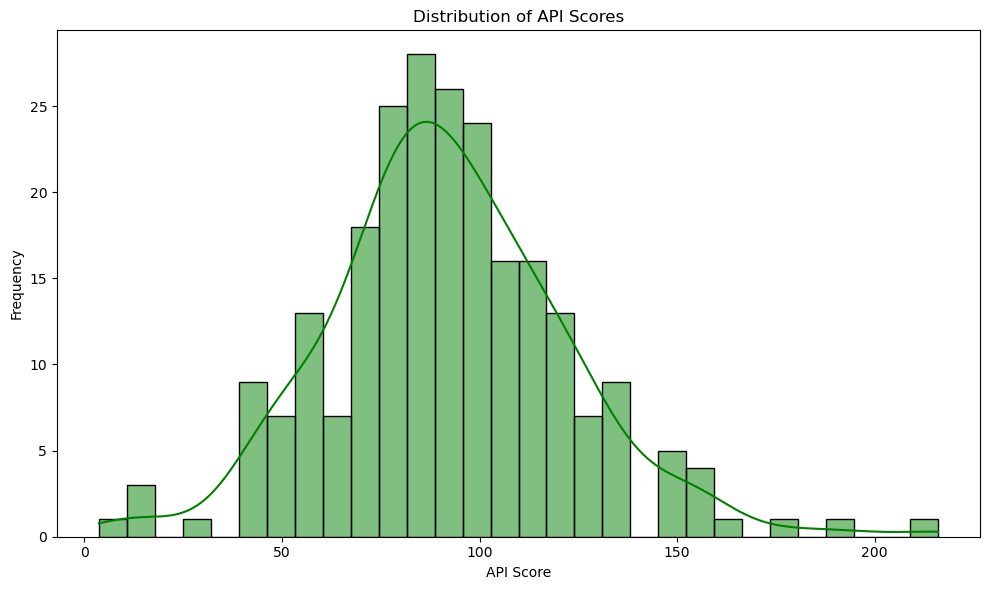

In [11]:
# Plot histogram of API scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['API'], bins=30, kde=True, color='green')
plt.title('Distribution of API Scores')
plt.xlabel('API Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

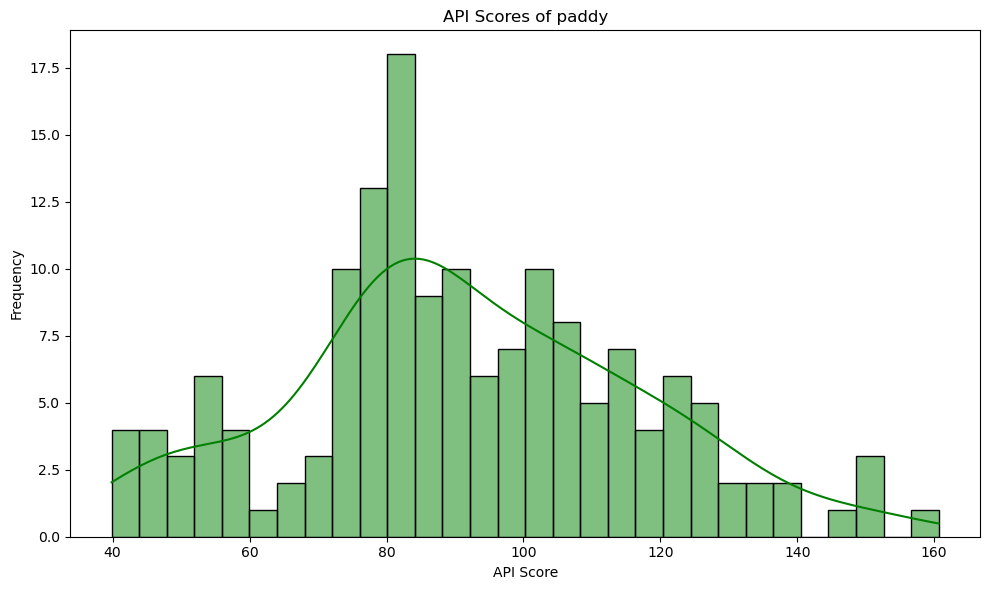

In [29]:
# API score of Paddy
paddy = df[df['croptype'].isin(['non-aromatic','aromatic'])]

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(paddy['API'], bins=30, kde=True, color='green')
plt.title('API Scores of paddy')
plt.xlabel('API Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
paddy['API'].describe()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=paddy['API'], color='lightgreen')
plt.title('Boxplot of API Scores')
plt.xlabel('API')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='province', y='API', data=paddy)
plt.xticks(rotation=90)
plt.title('API Distribution by Province')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(paddy[['API', 'fertilizer', 'pesticide', 'irrigation', 'total_holding']].corr(),
            annot=True, cmap='Greens')
plt.title('Correlation Between Variables')
plt.show()


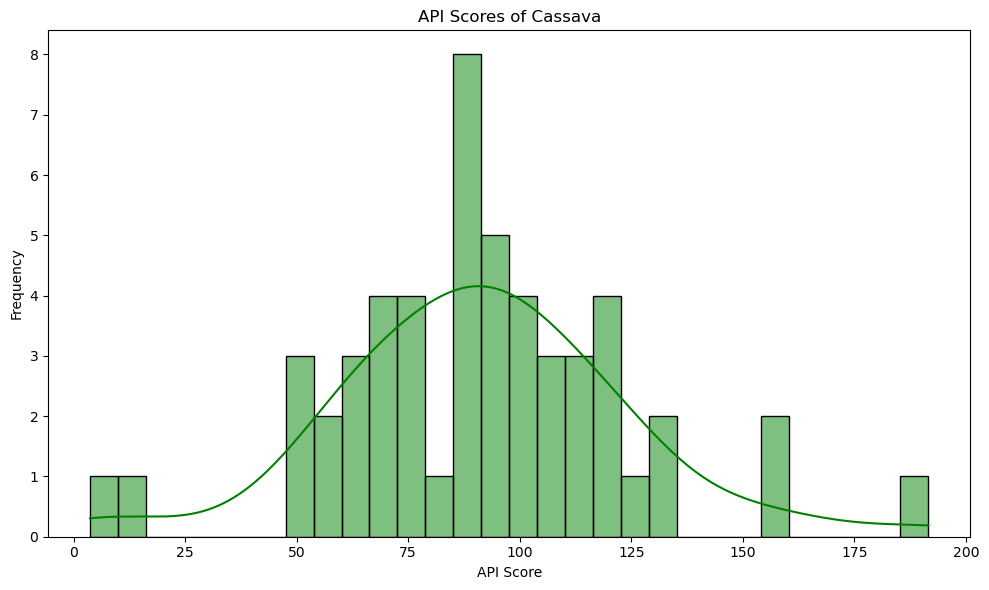

In [45]:
# API score of Cassava
cassava = df[df['croptype'].isin(['cassava'])]

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(cassava['API'], bins=30, kde=True, color='green')
plt.title('API Scores of Cassava')
plt.xlabel('API Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

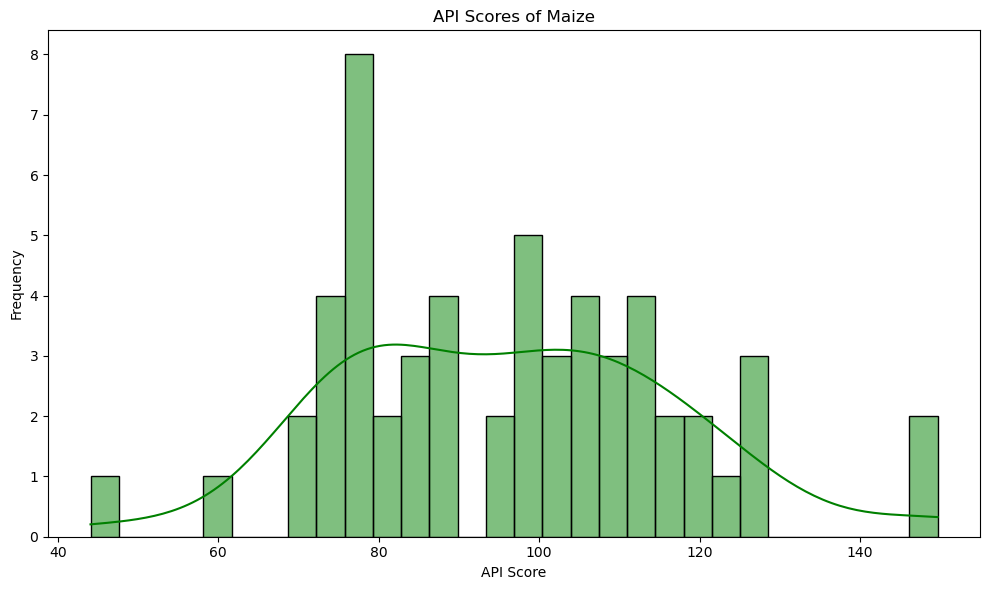

In [ ]:
# API score of Maize
maize = df[df['croptype'].isin(['maize'])]

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(maize['API'], bins=30, kde=True, color='green')
plt.title('API Scores of Maize')
plt.xlabel('API Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Labeling

In [ ]:
paddy['label'] = pd.qcut(
    x=paddy['API'],
    q=3,
    labels=['Low', 'Medium', 'High'],
    duplicates='drop' 
)

print(paddy['label'].value_counts())

bins = pd.qcut(paddy['API'], q=3, retbins=True)[1]
print(f"Cut-off Points (Tertiles): {bins}")

print(paddy[['API', 'label']].head())

label
Medium    53
Low       52
High      51
Name: count, dtype: int64
Cut-off Points (Tertiles): [ 39.84719612  81.13726809 102.23055096 160.65090258]
          API   label
0  111.996705    High
1  133.372307    High
2   85.097098  Medium
3  118.580525    High
4   95.843334  Medium


C:\Users\U-ser\AppData\Local\Temp\ipykernel_8016\1536697919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paddy['label'] = pd.qcut(


In [ ]:
cassava['label'] = pd.qcut(
    x=cassava['API'],
    q=3,
    labels=['Low', 'Medium', 'High'],
    duplicates='drop' 
)

print(cassava['label'].value_counts())

bins = pd.qcut(cassava['API'], q=3, retbins=True)[1]
print(f"Cut-off Points (Tertiles): {bins}")

# Display the first few rows with the new classification
print(cassava[['API', 'label']].head())

label
Low       18
Medium    17
High      17
Name: count, dtype: int64
Cut-off Points (Tertiles): [  3.69899535  77.58293464 101.80923175 191.55061488]
           API   label
42  125.843185    High
43   89.800720  Medium
44  115.129128    High
45  118.602351    High
46   90.147441  Medium


C:\Users\U-ser\AppData\Local\Temp\ipykernel_8016\691623137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cassava['label'] = pd.qcut(


In [ ]:
maize['label'] = pd.qcut(
    x=maize['API'],
    q=3,
    labels=['Low', 'Medium', 'High'],
    duplicates='drop' )


print(maize['label'].value_counts())

bins = pd.qcut(maize['API'], q=3, retbins=True)[1]
print(f"Cut-off Points (Tertiles): {bins}")
print(maize[['API', 'label']].head())

label
Low       10
Medium     9
High       9
Name: count, dtype: int64
Cut-off Points (Tertiles): [ 13.93925249  69.59094216 106.86800147 215.99976178]
           API   label
38  176.647059    High
39  113.235294    High
40   95.620915  Medium
41   75.490196  Medium
87   74.512671  Medium


C:\Users\U-ser\AppData\Local\Temp\ipykernel_8016\4030315748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize['label'] = pd.qcut(


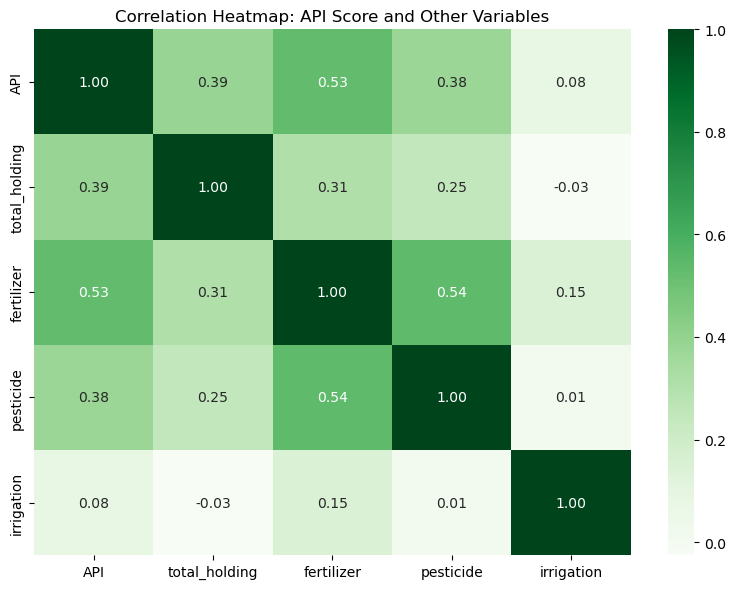

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['API', 'total_holding', 'fertilizer','pesticide','irrigation']
corr_matrix = paddy[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Heatmap: API Score and Other Variables')
plt.tight_layout()
plt.show()

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(paddy[['API','fertilizer','pesticide','irrigation']])

In [48]:
df_scaled = pd.DataFrame(X_scaled, columns=['API_norm','fertilizer_norm','pesticide_norm','irrigation_norm'])
df_scaled.head()

,API_norm,fertilizer_norm,pesticide_norm,irrigation_norm
0,0.597246,0.891892,0.729730,0.056251
1,0.774191,0.862069,0.655172,0.068507
2,0.374574,0.916667,0.166667,0.039419
3,0.651746,0.993827,0.765432,0.062486
4,0.463530,0.987342,0.759494,0.014370


c:\Users\U-ser\.anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\U-ser\.anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\U-ser\.anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\U-ser\.anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

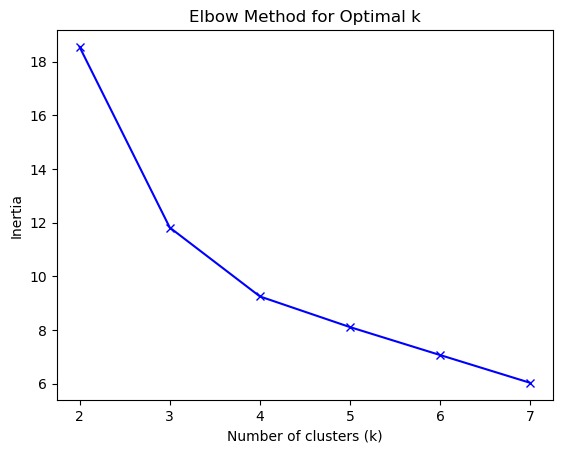

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []
K = range(2, 8)  
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

cluster = df_scaled.dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
paddy['API_cluster'] = kmeans.fit_predict(cluster)

cluster_map = {0: 'Low', 1: 'Medium', 2:'high'}
paddy['API_class'] = paddy['API_cluster'].map(cluster_map)
print(paddy['API_class'].value_counts())

c:\Users\U-ser\.anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\U-ser\.anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


API_class
Low       108
high       27
Medium     21
Name: count, dtype: int64


C:\Users\U-ser\AppData\Local\Temp\ipykernel_8016\1597788503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paddy['API_cluster'] = kmeans.fit_predict(cluster)
C:\Users\U-ser\AppData\Local\Temp\ipykernel_8016\1597788503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paddy['API_class'] = paddy['API_cluster'].map(cluster_map)


In [53]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, paddy["API_class"])
print("Silhouette Score:", score)

Silhouette Score: 0.5026079312617758
